In [1]:
import numpy as np ; PI = np.pi

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

import os
import inspect

In [2]:
# testing old methods:

# Testing 'local' no_jump method and getting the three default histograms:

# remove_PBC_traj_ needs to be looked at again, did not have time to find why very rarely it does not work exactly

In [3]:
# for these NPT datasets I used slower (old) methods
'''
no_jump_(R_in : np.ndarray,
             boxes : np.ndarray, # (3,3) vecs as columns!
             fit_molecules_compactly : bool = True # R_in should include the 1st frame which is topology like.
            )
'''
# and checked all results before saving coordinates as pickles, and then there is method in data_import to
# open them from pickles.
None

In [4]:
%cd /mnt/c/users/fordd/Desktop/code_clustering

import data_import

from radial_distributions import get_radial_distributions_
# ^ the centre of mass here is of whole molecule, which is not as good as centre of (main) ring.

/mnt/c/users/fordd/Desktop/code_clustering


In [17]:
which_trajectories = [1,2,3,4,5,6,8]
stride = 1

if only have default xtc files:

In [18]:
MAIN_DIR = '/mnt/c/Users/fordd/Desktop/UNI/DATA'
MOLECULE = 'IBUPROFEN'
FF = 'GAFF'
#DATASET = 'NVTs'
DATASET = 'NPTs'

# ************ : default trejectories (not pre-processed)
##

dir_dataset = '/'.join([MAIN_DIR,MOLECULE,FF,DATASET])
print(dir_dataset)

path_single_mol = '/'.join([MAIN_DIR,MOLECULE,FF,MOLECULE[:2]+'_'+FF+'_'+'single_mol.pdb'])
print(path_single_mol) # same indexing of atoms inside molecule as in the two types of files below.

paths_tops = [dir_dataset+'/'+x for x in ([x for x in os.walk(dir_dataset)][0][2]) if 'gro' in x]
paths_trajs = [dir_dataset+'/'+x for x in ([x for x in os.walk(dir_dataset)][0][2]) if '_.xtc' in x] # ************
print('numbers should match:', len(paths_tops), len(paths_trajs))

/mnt/c/Users/fordd/Desktop/UNI/DATA/IBUPROFEN/GAFF/NPTs
/mnt/c/Users/fordd/Desktop/UNI/DATA/IBUPROFEN/GAFF/IB_GAFF_single_mol.pdb
numbers should match: 543 543


In [19]:
xyz_local_nojump = data_import.XYZ(path_sm_top = path_single_mol,
                      paths_tops = paths_tops,
                      paths_trajs = paths_trajs)

xyz_local_nojump.import_files_by_index_(
                                        which_trajectories,
                                        keep_hydrogens = False, # only heavy atoms
                                        skip_first_frame = False,
                                        stride = stride,
                                        verbose = 1,

                                        apply_no_jump = True, # ************ doing that here.
                                        no_jump_method = 'local',
                                        )

**************************************************************************************************** 100% 
(time taken: 11.641s [0.116s/%] ETA: 0.0s)


if have trajectories with whole moelcules saved from before:

In [20]:
MAIN_DIR = '/mnt/c/Users/fordd/Desktop/UNI/DATA'
MOLECULE = 'IBUPROFEN'
FF = 'GAFF'
#DATASET = 'NVTs'
DATASET = 'NPTs'

# ************ : previusly pre-processed correctly
##

dir_dataset = '/'.join([MAIN_DIR,MOLECULE,FF,DATASET])
print(dir_dataset)

path_single_mol = '/'.join([MAIN_DIR,MOLECULE,FF,MOLECULE[:2]+'_'+FF+'_'+'single_mol.pdb'])
print(path_single_mol) # same indexing of atoms inside molecule as in the two types of files below.

paths_tops = [dir_dataset+'/'+x for x in ([x for x in os.walk(dir_dataset)][0][2]) if 'gro' in x]
paths_trajs = [dir_dataset+'/'+x for x in ([x for x in os.walk(dir_dataset)][0][2]) if 'nj.xtc' in x] # ************
print('numbers should match:', len(paths_tops), len(paths_trajs))

/mnt/c/Users/fordd/Desktop/UNI/DATA/IBUPROFEN/GAFF/NPTs
/mnt/c/Users/fordd/Desktop/UNI/DATA/IBUPROFEN/GAFF/IB_GAFF_single_mol.pdb
numbers should match: 543 543


In [21]:
xyz = data_import.XYZ(path_sm_top = path_single_mol,
                      paths_tops = paths_tops,
                      paths_trajs = paths_trajs)

xyz.import_files_by_index_(
                            which_trajectories,
                            keep_hydrogens = False, # only heavy atoms
                            skip_first_frame = False,
                            stride = stride,
                            verbose = 1,
                            apply_no_jump = False, # ************ doing nothing here.
                            )

**************************************************************************************************** 100% 
(time taken: 5.636s [0.056s/%] ETA: 0.0s)


# compare radial dist (it is slow):

In [22]:
hists_local = get_radial_distributions_(Rs = xyz_local_nojump.coordinates,
                          min_box_length = xyz_local_nojump.min_box_length,
                          boxes = xyz_local_nojump.boxes,
                          min_distance = 0.0,
                          masses = xyz_local_nojump.masses,
                          n_bins = 30,
                          use_kde = False)
'''
for i in range(len(hists_local)):
    fig = plt.figure(figsize=(30,4))
    plt.matshow(hists_local[i].T, fignum=0)
    plt.show()

'''
    
###########################################

hists = get_radial_distributions_(Rs = xyz.coordinates,
                          min_box_length = xyz.min_box_length,
                          boxes = xyz.boxes,
                          min_distance = 0.0,
                          masses = xyz.masses,
                          n_bins = 30,
                          use_kde = False)
'''
for i in range(len(hists)):
    fig = plt.figure(figsize=(30,4))
    plt.matshow(hists[i].T, fignum=0)
    plt.show()

'''

'\nfor i in range(len(hists)):\n    fig = plt.figure(figsize=(30,4))\n    plt.matshow(hists[i].T, fignum=0)\n    plt.show()\n\n'

In [23]:
(xyz_local_nojump.coordinates[0]).shape, (xyz.coordinates[0]).shape

((301, 288, 15, 3), (301, 288, 15, 3))

In [26]:
errs = [(np.abs(hists[i]-hists_local[i])).max() for i in range(len(hists))]
errs

[0.0010162723014634292,
 0.0010794860312113297,
 0.0014355753252870695,
 0.0010107763508808848,
 0.0009424278083841192,
 0.0010386344087898874,
 0.0013765171179764418]

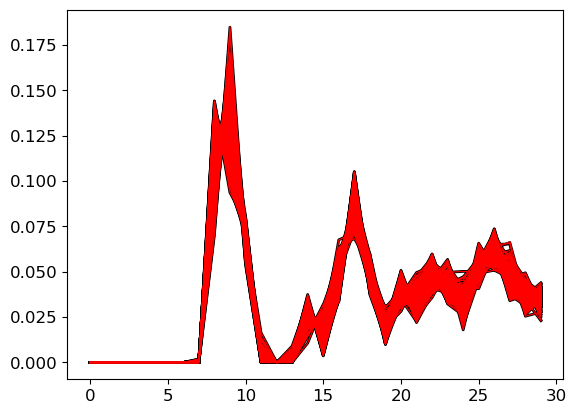

In [27]:
plt.plot(hists[np.argmax(errs)].T,color='black',linewidth=2)
plt.plot(hists_local[np.argmax(errs)].T,color='red',linewidth=0.8)
plt.show()

# compare rotational dist:

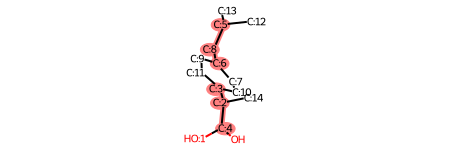

In [28]:
xyz.mol

In [29]:
inds_tripod = [3,7,9]

In [30]:
from rotations import get_rotational_hists_

hists_local = get_rotational_hists_(xyz_local_nojump.coordinates,
                                    supervised = inds_tripod,
                                    flatten_output = False,
                                    concatenate_output = False,
                                    n_bins = 30,
                                use_kde = False, # too slow again, this can be sorted out later (by making that part parallel).
                                   )

hists = get_rotational_hists_(xyz.coordinates,
                                    supervised = inds_tripod,
                                    flatten_output = False,
                                    concatenate_output = False,
                                    n_bins = 30,
                                use_kde = False, # too slow again, this can be sorted out later (by making that part parallel).
                                   )
print(len(hists), [x.shape for x in hists])

**************************************************************************************************** 100% 
(time taken: 11.35s [0.113s/%] ETA: 0.0s)
7 [(301, 1, 30, 30), (301, 1, 30, 30), (301, 1, 30, 30), (301, 1, 30, 30), (301, 1, 30, 30), (301, 1, 30, 30), (301, 1, 30, 30)]


In [31]:
[np.abs(x-y).max() for x,y in zip(hists_local,hists)]

[0.0003629500580720098,
 0.0006049167634533392,
 0.00042044108091579546,
 0.0004404228058936602,
 0.0004901960784313708,
 0.0004355400696864145,
 0.0003840245775729653]

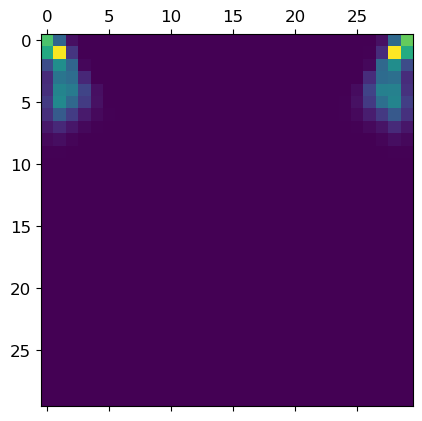

In [32]:
plt.matshow(hists[0][0,0])

i think its better overall for both types of histogram so far to use the new method (joint space).

if per-molecule hists are averaged within each frame, then enter Hellinger distance (no kenrel), the speed may be similar or faster.

When sorted out and proven (everything [old and new] needs to be optimised properly first), this fits into paper.

# compare torsions:

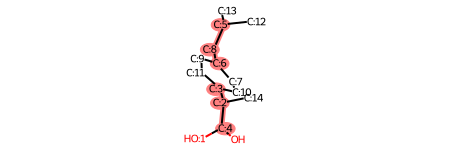

In [33]:
xyz.mol

In [34]:
inds_chiral = [2,14,3,4]

In [35]:
torsion_indices = xyz.torsion_indices
# !! symmetry between [12, 5, 8, 6] and [13, 5, 8, 6] was never taken into account.
# this needs to be imlemented.
CV_indices = [[4,2,8,5],[6,8,5,13]]

4 torsional angles found in this molecule, between atom pairs:
[2 3]
[2 4]
[5 8]
[6 8]

chosen torsion indices:
[4, 2, 3, 10]
[3, 2, 4, 0]
[12, 5, 8, 6]
[9, 6, 8, 5]


In [36]:
Rs_local = xyz_local_nojump.coordinates
Rs = xyz.coordinates

In [37]:
from features import clamp_chiral_, get_torsions_
from histograms import get_torsion_histograms_

In [38]:
CVs_local = get_torsions_(clamp_chiral_(Rs_local, inds_chiral=inds_chiral), torsion_indices = CV_indices)
CVs = get_torsions_(clamp_chiral_(Rs, inds_chiral=inds_chiral), torsion_indices = CV_indices)

1.0
1.0


In [39]:
hists_CVs = get_torsion_histograms_(CVs, n_bins=40, kde_parameter=39, flattened_outputs=False)
hists_CVs_local = get_torsion_histograms_(CVs_local, n_bins=40, kde_parameter=39, flattened_outputs=False)

# for some reason here kde works fast, but not in the other two cases.
# i dont remember why.

**************************************************************************************************** 100% 
(time taken: 8.151s [0.082s/%] ETA: 0.0s)


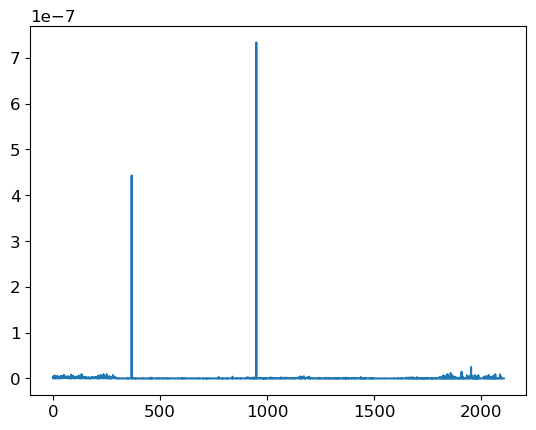

In [40]:
plt.plot(np.sum((hists_CVs-hists_CVs_local)**2, axis=(-2,-3,-1)))

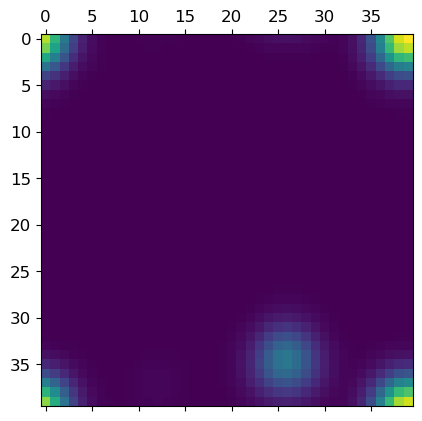

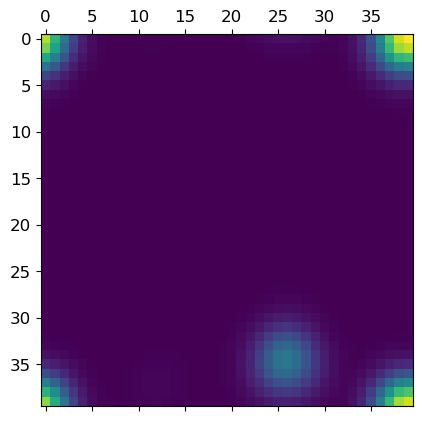

In [41]:
plt.matshow(hists_CVs[500,0])
plt.matshow(hists_CVs_local[500,0])

In [42]:
# data here only has this:

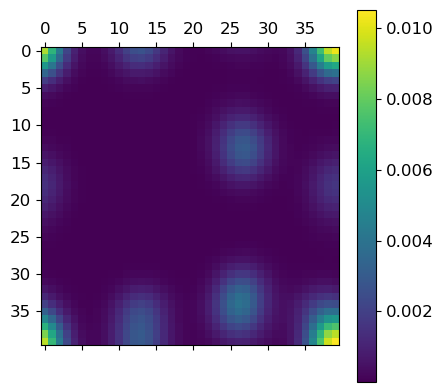

In [43]:
plt.matshow(hists_CVs.mean(0)[0])
plt.colorbar()

# Distance matrices

In [44]:
from distances import hellinger_distance_

**************************************************************************************************** 100% 
(time taken: 8.2s [0.082s/%] ETA: 0.0s)
CPU times: user 1min 9s, sys: 3.31 s, total: 1min 12s
Wall time: 8.83 s


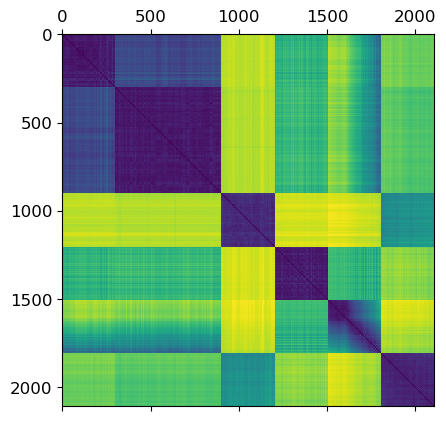

In [46]:
%%time

hists_CVs = get_torsion_histograms_(CVs, n_bins=40, kde_parameter=39, flattened_outputs=True)
HD_CVs = hellinger_distance_(hists_CVs)

plt.matshow(HD_CVs)

In [47]:
from features import cossin_torsions_
from distances import HDL_distance_, simple_matrix_distance_
from utils import concat_to_molecule_

In [48]:
csCVs = cossin_torsions_(CVs) ; print(len(csCVs), [x.shape for x in csCVs])

7 [(301, 288, 4), (301, 288, 4), (301, 324, 4), (301, 224, 4), (301, 256, 4), (301, 288, 4), (301, 280, 4)]


nL = number of landmarks

In [130]:
nL = 50

In [153]:
# random landmarks from data:
csCVs_data = cossin_torsions_(concat_to_molecule_(CVs)) ; print(len(csCVs_data), [x.shape for x in csCVs_data])
csCVs_data = csCVs_data[0]
landmarks = csCVs_data[np.random.choice(csCVs_data.shape[0],nL,replace=False)]
print(landmarks.shape)

1 [(586348, 4)]
(50, 4)


CPU times: user 1.63 s, sys: 1.75 s, total: 3.38 s
Wall time: 1.24 s


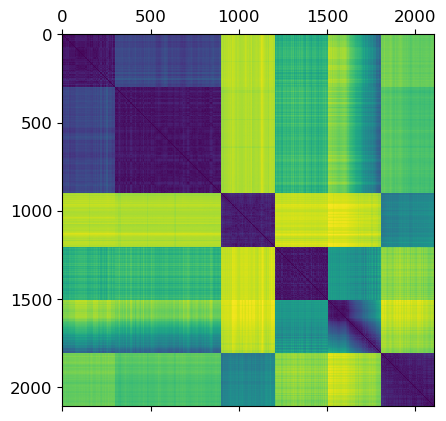

In [154]:
%%time
HDL_CVs_from_data = HDL_distance_(csCVs, lands=landmarks, gamma = 11.5)
plt.matshow(HDL_CVs_from_data)

In [155]:
# random landmarks from space:
landmarks = cossin_torsions_(np.random.rand(nL,2)*PI*2 - PI)[0]
print(landmarks.shape)

(50, 4)


CPU times: user 1.34 s, sys: 2.16 s, total: 3.5 s
Wall time: 1.24 s


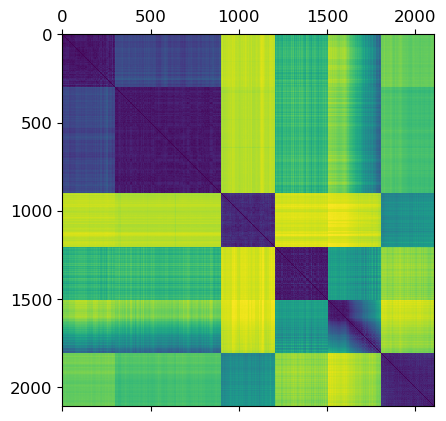

In [156]:
%%time
HDL_CVs = HDL_distance_(csCVs, lands=landmarks, gamma = 11.5)
plt.matshow(HDL_CVs)

In [157]:
from rematch import REMatch_distance_

In [158]:
#R_CVs = REMatch_distance_(csCVs[0][:20], Y = None, gamma=3.5)
# too slow (time taken: 206.471s [2.065s/%] ETA: 0.0s)

In [159]:
from fsdp import *
from feature_ranking import check_clustering_agreements_

5 orange points.


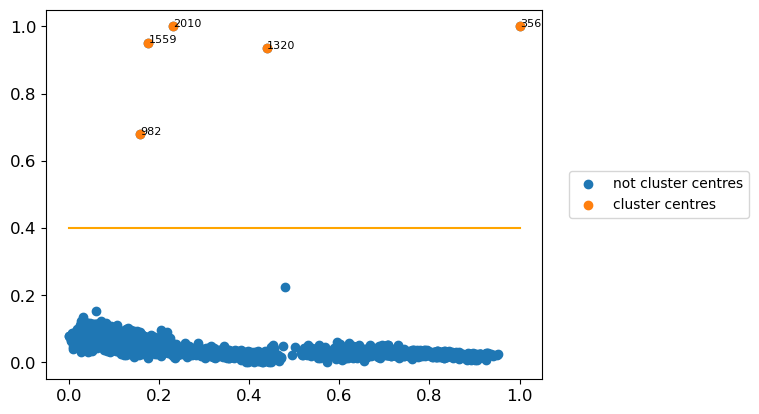

Returning labels for 5 clusters found.
5 orange points.


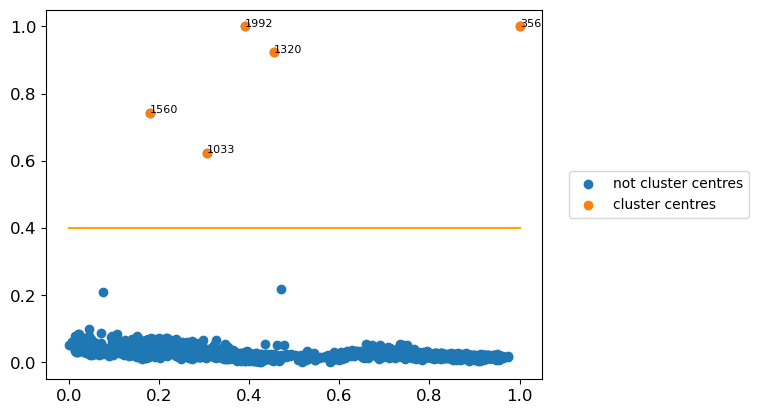

Returning labels for 5 clusters found.
5 orange points.


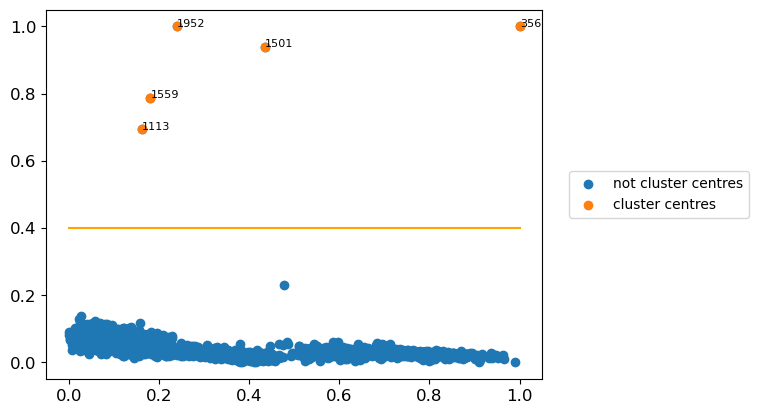

Returning labels for 5 clusters found.


In [160]:
cut_off_d = 0.4

fsdp = FSDP(sta_array_(HD_CVs),gamma=150)
fsdp.place_flat_decision_boundary(cut_off_d = cut_off_d , verbose = True)
c_HD = fsdp.return_cluster_assignments()
inds_centres_HD = fsdp.inds_cluster_centres

fsdp = FSDP(sta_array_(HDL_CVs_from_data),gamma=150)
fsdp.place_flat_decision_boundary(cut_off_d = cut_off_d , verbose = True)
c_HDL_from_data = fsdp.return_cluster_assignments()
inds_centres_HDL_from_data = fsdp.inds_cluster_centres

fsdp = FSDP(sta_array_(HDL_CVs),gamma=150)
fsdp.place_flat_decision_boundary(cut_off_d = cut_off_d , verbose = True)
c_HDL = fsdp.return_cluster_assignments()
inds_centres_HDL = fsdp.inds_cluster_centres

In [161]:
check_clustering_agreements_([c_HD, c_HDL, c_HDL_from_data])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [162]:
inds_centres_HD, inds_centres_HDL_from_data, inds_centres_HDL

(array([ 356,  982, 1320, 1559, 2010]),
 array([ 356, 1033, 1320, 1560, 1992]),
 array([ 356, 1113, 1501, 1559, 1952]))

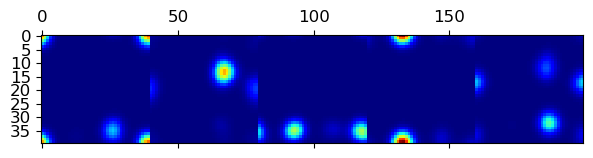

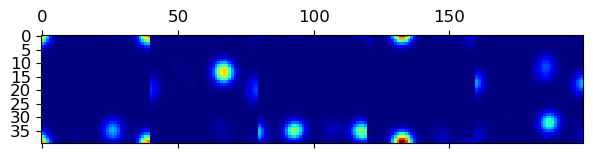

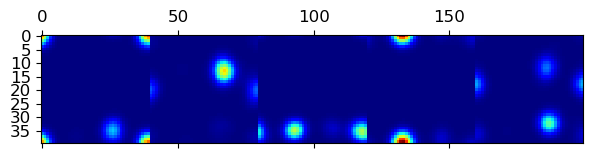

In [163]:
fig = plt.figure(figsize=(7,4))
plt.matshow(np.concatenate([hists_CVs.reshape(len(HD_CVs),40,40)[i] for i in inds_centres_HD],axis=1),cmap='jet',fignum=1)
plt.show()
fig = plt.figure(figsize=(7,4))
plt.matshow(np.concatenate([hists_CVs.reshape(len(HD_CVs),40,40)[i] for i in inds_centres_HDL_from_data],axis=1),cmap='jet',fignum=1)
plt.show()
fig = plt.figure(figsize=(7,4))
plt.matshow(np.concatenate([hists_CVs.reshape(len(HD_CVs),40,40)[i] for i in inds_centres_HDL],axis=1),cmap='jet',fignum=1)
plt.show()

In [123]:
# centroids are not the optimal ones for HDL, even at high nL, as dicussed. 
# toy example showing this even in simple cases, to follow.

# cluster assignments are ok.